In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt


In [3]:
%matplotlib inline

### Parameters needed

In [4]:
train_ds = "emnist-letters-train.csv"
test_ds = "emnist-letters-test.csv"
categories = 37
labels = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

### Preparing Train Data & Normalization

In [5]:
def Prep_raw_data(raw):
    y_raw = raw[:, 0]
    y_train = keras.utils.to_categorical(y_raw, categories)


    x_train = raw[:, 1:]
    img_in_set = raw.shape[0]
    x_train /= 255
    return x_train, y_train

### Convert from One_hot encoding  to real values

In [6]:
def Decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

### Plot image samples

In [7]:
def Plot_img(img, label, indx):
    flip = np.transpose(img, axes=[1,0])
    plt.title('Label : ' + str(labels[Decode_label(label)]))
    plt.imshow(flip, cmap='gray')

### Testing and Evaluating

In [8]:
def Testing(model,X_test,Y_test):
    test_res = model.evaluate(X_test, Y_test)
    print("Accuracy of the model: ",test_res[1])
    return test_res

### Load training data

In [9]:
Train = np.loadtxt(train_ds, skiprows=1, delimiter=',')
X_train, y_train_orig = Prep_raw_data(Train)

In [10]:
Y_train = np.resize(y_train_orig, (X_train.shape[0], ))

In [11]:
print(X_train.shape)
print(Y_train.shape)

(88799, 784)
(88799,)


In [12]:
len(Y_train)

88799

In [13]:
Y_train[6]

0.0

In [14]:
Decode_label(Y_train[6])

-1

### Visualize Train Data

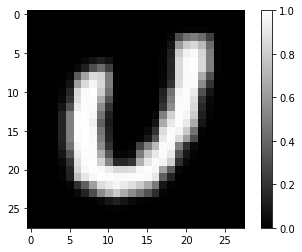

Label of image "40" = U


In [14]:
ex = 40
image = X_train[ex]
label = Decode_label(y_train_orig[ex])
def fit_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

plt.imshow(fit_rotate(image), cmap= 'gray')
plt.colorbar()
plt.show()
print('Label of image "%d" = %s' % (ex, labels[label]))

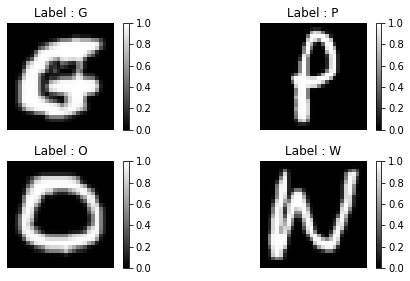

In [15]:
fig = plt.figure(figsize=(8,4.5))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.axis('off')
    X_train_img = X_train.reshape(X_train.shape[0], 28, 28, 1)
    Plot_img(np.squeeze(X_train_img[i],), y_train_orig[i], i)
    plt.colorbar()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

### Load testing data

In [16]:
Test = np.loadtxt(test_ds, skiprows=1, delimiter=',')
X_test, y_test_orig = Prep_raw_data(Test)

In [17]:
Y_test = np.resize(y_test_orig, (X_test.shape[0], ))

In [18]:
print(X_test.shape)
print(Y_test.shape)

(14799, 784)
(14799,)


In [19]:
len(X_train[0])

784

In [20]:
len(Y_train)

88799

In [21]:
X_test.shape[0]

14799

## Build a model

In [22]:
# Create a more complex model
# More layers for better accuracy

def Build_model():
    
    input_size = len(X_train[0])
    output_size = len(Y_train)
    
    model = Sequential()

    model.add(Dense(240, input_dim = input_size , activation = 'relu'))
    model.add(Dense(124, activation = 'relu'))
    model.add(Dense(64, activation = 'relu' ))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

### Compile & Train the model

In [23]:
Model = Build_model()
history = Model.fit(X_train, Y_train,
          batch_size = 64,
          epochs = 10,
          validation_split = 0.1)

Train on 79919 samples, validate on 8880 samples
Epoch 1/10
79919/79919 [==============================] - 208s 3ms/sample - loss: 0.2690 - accuracy: 0.9714 - val_loss: 0.1394 - val_accuracy: 0.9730
Epoch 2/10
79919/79919 [==============================] - 201s 3ms/sample - loss: 0.1319 - accuracy: 0.9730 - val_loss: 0.1293 - val_accuracy: 0.9730
Epoch 3/10
79919/79919 [==============================] - 203s 3ms/sample - loss: 0.1288 - accuracy: 0.9730 - val_loss: 0.1307 - val_accuracy: 0.9730
Epoch 4/10
79919/79919 [==============================] - 202s 3ms/sample - loss: 0.1270 - accuracy: 0.9730 - val_loss: 0.1336 - val_accuracy: 0.9730
Epoch 5/10
79919/79919 [==============================] - 201s 3ms/sample - loss: 0.1248 - accuracy: 0.9730 - val_loss: 0.1269 - val_accuracy: 0.9730
Epoch 6/10
79919/79919 [==============================] - 202s 3ms/sample - loss: 0.1234 - accuracy: 0.9730 - val_loss: 0.1283 - val_accuracy: 0.9730
Epoch 7/10
79919/79919 [===========================

### Cross validation & learning curves

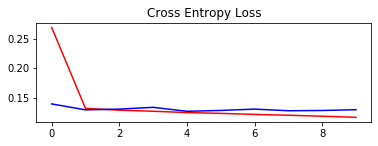

In [24]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')

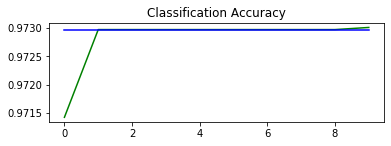

In [25]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.show()

### Save the model

In [26]:
import os.path

if os.path.isfile('AI_EMNIST OCR.h5') is False:
    Model.save('AI_EMNIST OCR.h5')

### Load & Test the model

In [27]:
from tensorflow.keras.models import load_model

loaded_model = load_model('AI_EMNIST OCR.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 240)               188400    
_________________________________________________________________
dense_1 (Dense)              (None, 124)               29884     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8000      
_________________________________________________________________
dense_3 (Dense)              (None, 88799)             5771935   
Total params: 5,998,219
Trainable params: 5,998,219
Non-trainable params: 0
_________________________________________________________________


In [28]:
Testing(loaded_model,X_test,Y_test)

14799/14799 [==============================] - 30s 2ms/sample - loss: 0.1477 - accuracy: 0.9717
Accuracy of the model:  0.97168726


[0.14772727688634382, 0.97168726]

### Visualize Test Data

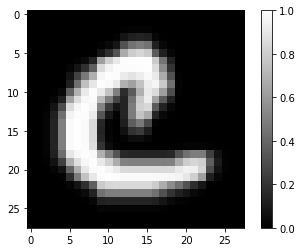

Label of image "1785" = C


In [29]:
ex = 1785
image = X_test[ex]
label = Decode_label(y_test_orig[ex])
def fit_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

plt.imshow(fit_rotate(image), cmap= 'gray')
plt.colorbar()
plt.show()
print('Label of image "%d" = %s' % (ex, labels[label]))

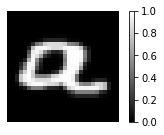

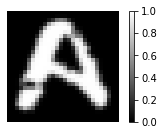

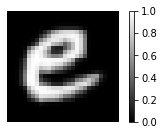

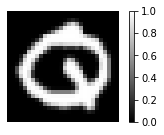

In [30]:
# A few random samples
use_samples = [5, 38, 3939, 13389]
samples_to_predict = []

for sample in use_samples :
    fig = plt.figure(figsize=(8,4.5))
    fig.add_subplot(2,2,1)
    reshaped_image = X_test[sample].reshape((28, 28))
    plt.imshow(fit_rotate(reshaped_image), cmap= 'gray')
    plt.axis('off')
    plt.colorbar()
    plt.show()
  # Add sample to array for prediction
samples_to_predict.append(X_test[sample])

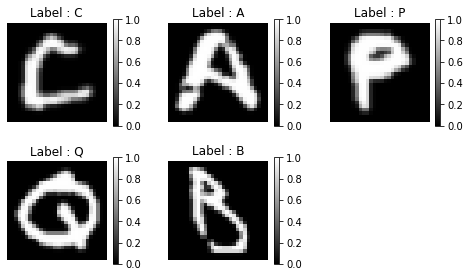

In [31]:
# A few random samples
use_samples = [1995, 38, 12566, 13389,1336]
samples_to_predict = []

fig = plt.figure(figsize=(8,4.5))
for i in range(5):
    fig.add_subplot(2,3,i+1)
    plt.axis('off')
    X_test_img = X_test.reshape(X_test.shape[0], 28, 28, 1)
    Plot_img(np.squeeze(X_test_img[use_samples[i]],), y_test_orig[use_samples[i]],use_samples[i])
    plt.colorbar()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
samples_to_predict.append(X_test[use_samples[i]])


In [32]:
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(1, 784)


In [33]:
# Generate predictions for the samples
pr = loaded_model.predict(samples_to_predict)
print(pr)

[[9.5621312e-01 4.3786895e-02 1.3812800e-14 ... 1.2259446e-14
  1.3202281e-14 1.4771928e-14]]


In [ ]:
#testing train 
import matplotlib.pyplot as plt
%matplotlib tk
fig , ax = plt.subplots()
for x in range(X_train.shape[0]):
    ax.clear()
    ax.imshow([i for i in 255 - X_train.reshape(88799,28,28)[x].T],cmap='gray')
    label = Decode_label(y_train_orig[x])
    title = 'lable = %d = %s' % (label,labels[label])
    ax.set_title(title, fontsize=20)
    plt.pause(1)